In [5]:
import os
import pickle
from glob import glob
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

from utils import avg

In [7]:
results_dir = 'results'
problems = ['adlittle', 'afiro', 'agg2','agg3','agg', 'bandm',
 'beaconfd', 'blend', 'bnl1', 'boeing1', 'boeing2', 'bore3d', 'brandy', 'capri',
 'cre-c', 'cycle', 'degen2', 'degen3', 'e226', 'etamacro', 'fffff800', 'finnis',
 'fit1d', 'fit1p', 'forplan', 'ganges', 'gfrd-pnc', 'grow15', 'grow22', 'grow7',
 'israel', 'kb2', 'ken-07', 'lotfi', 'maros', 'modszk1', 'pds-02', 'perold',
 'pilot4', 'pilotnov', 'pilot', 'qap08', 'recipe', 'sc105', 'sc205', 'sc50a',
 'sc50b', 'scagr25', 'scagr7', 'scfxm1', 'scfxm2', 'scfxm3', 'scorpion', 'scrs8',
 'scsd1', 'scsd6', 'scsd8', 'sctap1', 'sctap2', 'sctap3', 'seba', 'share1b',
 'share2b', 'shell', 'ship04l', 'ship04s', 'ship08l', 'ship08s', 'ship12l', 'ship12s',
 'sierra', 'stair', 'standata', 'standgub', 'standmps', 'stocfor1', 'stocfor2', 'tuff',
 'vtp_base', 'wood1p']     


avgs = {'lp_time': [], 'sd_time': [], 'first_sd': [], 'avg_sd': [],
        'lp_iters': [], 'sd_iters': []}
from statistics import median

figure_dir = 'figures'
if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    try: 
        avgs['first_sd'].append(sd_results['solve_times'][0])
        avgs['avg_sd'].append(avg(sd_results['solve_times'][1:]))
        avgs['lp_time'].append(lp_results['solve_time_total'])
        avgs['sd_time'].append(sd_results['solve_time_total'])
        avgs['lp_iters'].append(lp_results['n_iters'])
        avgs['sd_iters'].append(sd_results['n_iters'])
    except KeyError:
        print('skipping {}'.format(problem))
        continue
        
for metric in avgs:
    print('Average {}: {}'.format(metric, avg(avgs[metric])))
    print('Median {}: {}'.format(metric, median(avgs[metric])))

Average lp_time: 0.03222894064987762
Median lp_time: 0.010060548782348633
Average sd_time: 3.995421614827989
Median sd_time: 1.1447649002075195
Average first_sd: 0.03335320195065269
Median first_sd: 0.015625
Average avg_sd: 0.003662154175117501
Median avg_sd: 0.0020800272623697916
Average lp_iters: 452.60759493670884
Median lp_iters: 285.0
Average sd_iters: 231.59493670886076
Median sd_iters: 137


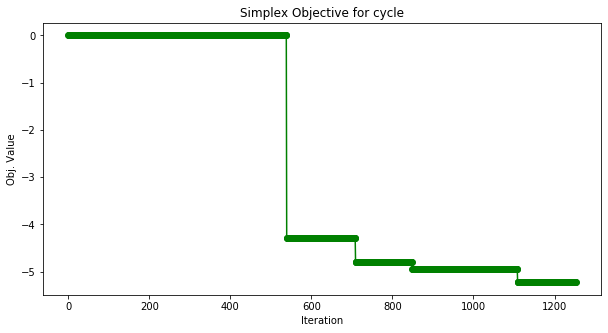

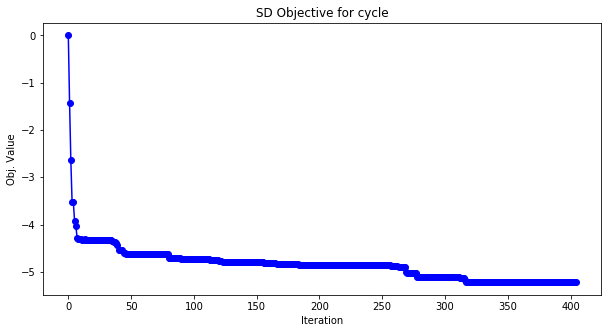

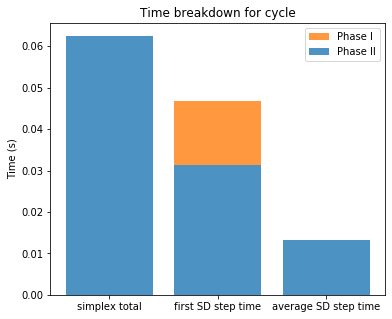

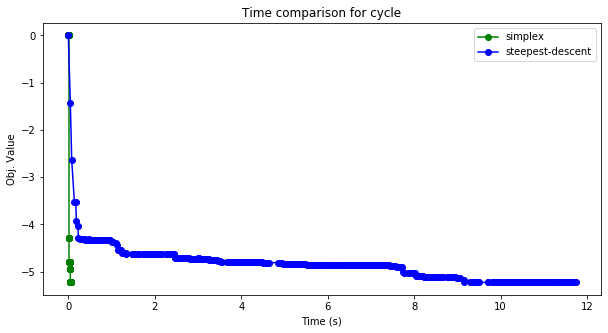

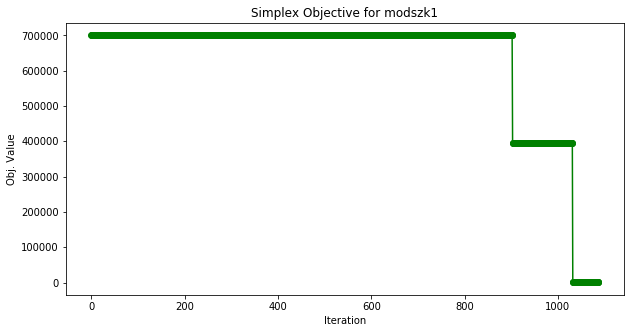

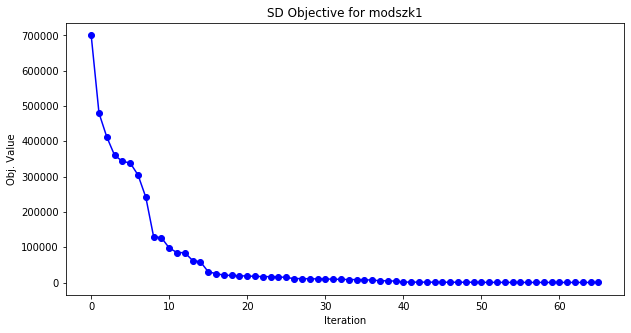

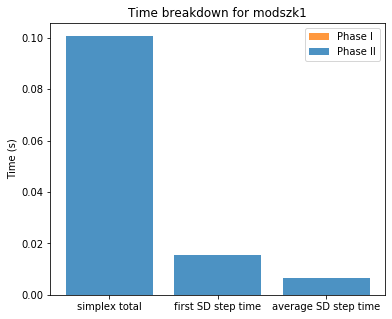

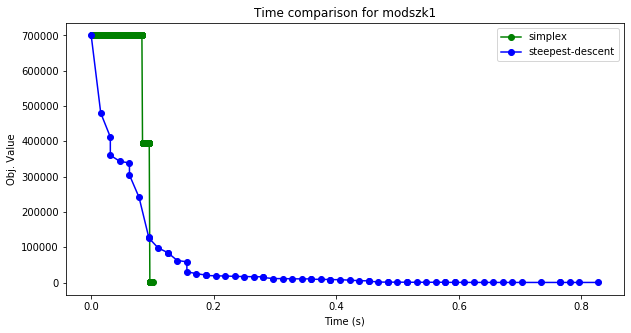

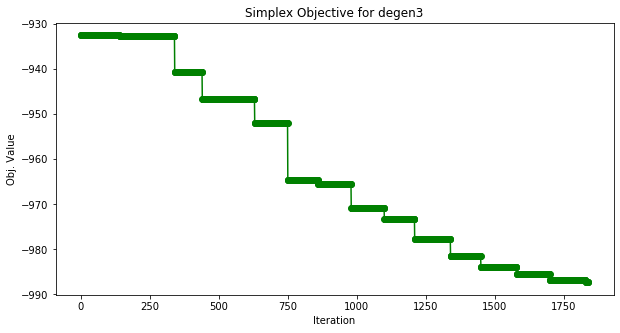

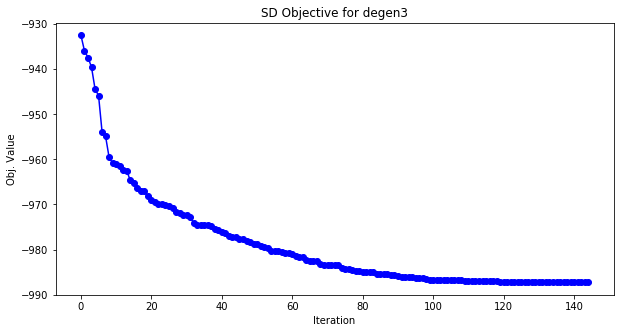

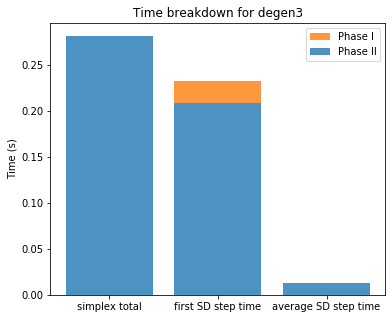

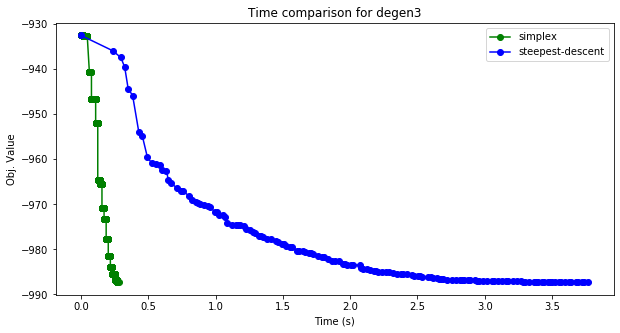

In [4]:
problems = ['stocfor2', 'cycle', 'modszk1', 'standmps', 'shell',
            'scagr25', 'scfxm2', 'etamacro', 'qap08', 'share1b',
            'grow15', 'grow22', 'grow7', 'cre-c', 'degen3']
problems = ['cycle', 'modszk1', 'degen3']


results_dir = 'results_dual_simplex_phase1'
figure_dir = 'figs_final'
save_figs = True

if not os.path.exists(figure_dir): os.mkdir(figure_dir)
for problem in problems:
    lp_fn = os.path.join(results_dir, problem + '_lp.p')
    sd_fn = os.path.join(results_dir, problem + '_sd.p')
    if not os.path.exists(sd_fn): continue
    problem_name = problem
    
    with open(lp_fn, 'rb') as f:
        lp_results = pickle.load(f)
    with open(sd_fn, 'rb') as f:
        sd_results = pickle.load(f)
        
    lp_results['obj_values'].append(lp_results['obj'])  
    lp_results['iter_times'].append(lp_results['solve_time_total'])  
    plt.figure(figsize=(10,5))
    plt.title('Simplex Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(lp_results['obj_values']))), lp_results['obj_values'], 'go-')
    fn = os.path.join(figure_dir, '{}_{}_lp_iter.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.title('SD Objective for {}'.format(problem_name))
    plt.xlabel('Iteration')
    plt.ylabel('Obj. Value')
    plt.plot(list(range(len(sd_results['obj_values']))), sd_results['obj_values'], 'bo-')
    fn = os.path.join(figure_dir, '{}_{}_sd_iter.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    
    times = {}
    #times['sd total'] = sd_results['solve_time_total']
    times['simplex total'] = lp_results['solve_time_total']
    times['first SD step time'] = sd_results['solve_times'][0]
    times['average SD step time'] = avg(sd_results['solve_times'][1:])
    #times['first SD Phase1 time'] = sd_results['sub_times']['phase1_times'][0]
    phase1_time = sd_results['sub_times']['phase1_times'][0]
    phase1_times = [0, phase1_time, 0]
    times['first SD step time'] -= phase1_time
    
    time_types = [key for key in times]

    #f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    plt.figure(figsize=(6,5))
    plt.title('Time breakdown for {}'.format(problem_name))
    plt.ylabel('Time (s)')
    x_pos = np.arange(len(time_types))
    plt.xticks(x_pos, time_types)
    values = [times[key] for key in times]
    p2 = plt.bar(x_pos, values, align='center', alpha=0.8)
    p1 = plt.bar(x_pos, phase1_times, bottom=values, align='center', alpha=0.8)
    fn = os.path.join(figure_dir, '{}_{}_time_breakdown.png'.format(problem, results_dir))
    plt.legend((p1[0], p2[0]), ('Phase I', 'Phase II'))
    plt.ylim(top=times['simplex total']*1.05)
    if save_figs: plt.savefig(fname=fn)
    plt.show()

    #ax2.set_title('Step breakdown for {}'.format(problem_name))
    #ax2.set_ylabel('Time (s)')
    #x_pos = np.arange(len(subtime_types))
    #ax2.set_xticks(x_pos)
    #ax2.set_xticklabels(subtime_types)
    #values = [subtimes[key] for key in subtimes]
    #ax2.bar(x_pos, values, align='center', alpha=0.8, color='m')
    #f.show()  
    
    plt.figure(figsize=(10,5))
    plt.title('Time comparison for {}'.format(problem_name))
    plt.xlabel('Time (s)')
    plt.ylabel('Obj. Value')
    plt.plot(lp_results['iter_times'], lp_results['obj_values'], 'go-', label='simplex')
    plt.plot(sd_results['iter_times'], sd_results['obj_values'], 'bo-', label='steepest-descent')
    plt.legend(loc='upper right')
    fn = os.path.join(figure_dir, '{}_{}_time_comp.png'.format(problem, results_dir))
    if save_figs: plt.savefig(fname=fn)
    plt.show()
    